In [1]:
# importing various libraries which are used 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing as p
from scipy.stats import f
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score

In [2]:
# taking the csv file as input to create the model
file=input("csv file_name : ")

csv file_name : 527.csv


In [3]:
# creating a pandas dataframe using the values obtained in the csv
df=pd.read_csv(file)

In [4]:
# printing the head of the data frame to get the gist of the values
print("\n data frame head :- \n",df.head())


 data frame head :- 
        time  cpu-cycles  instructions  l1d.replacement  icache_64b.iftag_miss  \
0  0.100124   391442619     838033474          4672892                1938487   
1  0.200384   458722014     824494445          8012511                 724536   
2  0.300599   458090406     968199504         14803958                2033882   
3  0.400817   458921423    2440757647         36134878                 114897   
4  0.501015   459421503    2665878574         36380102                  13650   

   l2_rqsts.all_demand_miss  longest_lat_cache.miss  \
0                   4101309                 3950947   
1                   4206029                 4924493   
2                   3543501                 4925686   
3                   3041511                  980581   
4                     16107                   48206   

   br_inst_retired.all_branches  frontend_retired.itlb_miss  \
0                     127387471                        7095   
1                     166774863  

In [5]:
# creating a new col in our data frame which consists of the CPI per tuple 
df[['CPI']]=df[['cpu-cycles']].div(df['instructions'], axis=0)
print(df)

            time  cpu-cycles  instructions  l1d.replacement  \
0       0.100124   391442619     838033474          4672892   
1       0.200384   458722014     824494445          8012511   
2       0.300599   458090406     968199504         14803958   
3       0.400817   458921423    2440757647         36134878   
4       0.501015   459421503    2665878574         36380102   
...          ...         ...           ...              ...   
1782  178.703398   459076862    1106282014         25237706   
1783  178.803633   459296289    1105537370         24946579   
1784  178.903849   459185132    1095741849         24587823   
1785  179.004076   459332212    1097159966         24346215   
1786  179.052989   223728647     513519272          6688965   

      icache_64b.iftag_miss  l2_rqsts.all_demand_miss  longest_lat_cache.miss  \
0                   1938487                   4101309                 3950947   
1                    724536                   4206029                 4924493   


In [6]:
# dividing all the values by instruction so that we get values in each coloumn per instruction basis 
df[['l1d.replacement','icache_64b.iftag_miss','l2_rqsts.all_demand_miss','longest_lat_cache.miss','br_inst_retired.all_branches','frontend_retired.itlb_miss','itlb_misses.walk_completed','dtlb_load_misses.walk_completed','dtlb_store_misses.walk_completed','branch-misses']]=df[['l1d.replacement','icache_64b.iftag_miss','l2_rqsts.all_demand_miss','longest_lat_cache.miss','br_inst_retired.all_branches','frontend_retired.itlb_miss','itlb_misses.walk_completed','dtlb_load_misses.walk_completed','dtlb_store_misses.walk_completed','branch-misses']].div(df['instructions'], axis=0)
print(df)

            time  cpu-cycles  instructions  l1d.replacement  \
0       0.100124   391442619     838033474         0.005576   
1       0.200384   458722014     824494445         0.009718   
2       0.300599   458090406     968199504         0.015290   
3       0.400817   458921423    2440757647         0.014805   
4       0.501015   459421503    2665878574         0.013647   
...          ...         ...           ...              ...   
1782  178.703398   459076862    1106282014         0.022813   
1783  178.803633   459296289    1105537370         0.022565   
1784  178.903849   459185132    1095741849         0.022439   
1785  179.004076   459332212    1097159966         0.022190   
1786  179.052989   223728647     513519272         0.013026   

      icache_64b.iftag_miss  l2_rqsts.all_demand_miss  longest_lat_cache.miss  \
0                  0.002313                  0.004894                0.004715   
1                  0.000879                  0.005101                0.005973   


In [7]:
# droping values such as time , instructions , cpu-cycles and br_inst_retired.all_branches
df= df.drop(['time'], axis=1)
df= df.drop(['instructions'], axis=1)
df= df.drop(['cpu-cycles'], axis=1)
df= df.drop(['br_inst_retired.all_branches'], axis=1)

In [8]:
# assigning y as the CPI and then droping it from the dataframe
y=df['CPI']
df= df.drop(['CPI'], axis=1)
print("y values :- \n",y)

y values :- 
 0       0.467097
1       0.556368
2       0.473136
3       0.188024
4       0.172334
          ...   
1782    0.414973
1783    0.415451
1784    0.419063
1785    0.418656
1786    0.435677
Name: CPI, Length: 1787, dtype: float64


In [9]:
# assigning x as the dataframe 
x=df
print("x values :- \n",x)

x values :- 
       l1d.replacement  icache_64b.iftag_miss  l2_rqsts.all_demand_miss  \
0            0.005576               0.002313                  0.004894   
1            0.009718               0.000879                  0.005101   
2            0.015290               0.002101                  0.003660   
3            0.014805               0.000047                  0.001246   
4            0.013647               0.000005                  0.000006   
...               ...                    ...                       ...   
1782         0.022813               0.001716                  0.005749   
1783         0.022565               0.001710                  0.005635   
1784         0.022439               0.001702                  0.005565   
1785         0.022190               0.001699                  0.005527   
1786         0.013026               0.000169                  0.002231   

      longest_lat_cache.miss  frontend_retired.itlb_miss  \
0                   0.004715         

<AxesSubplot:>

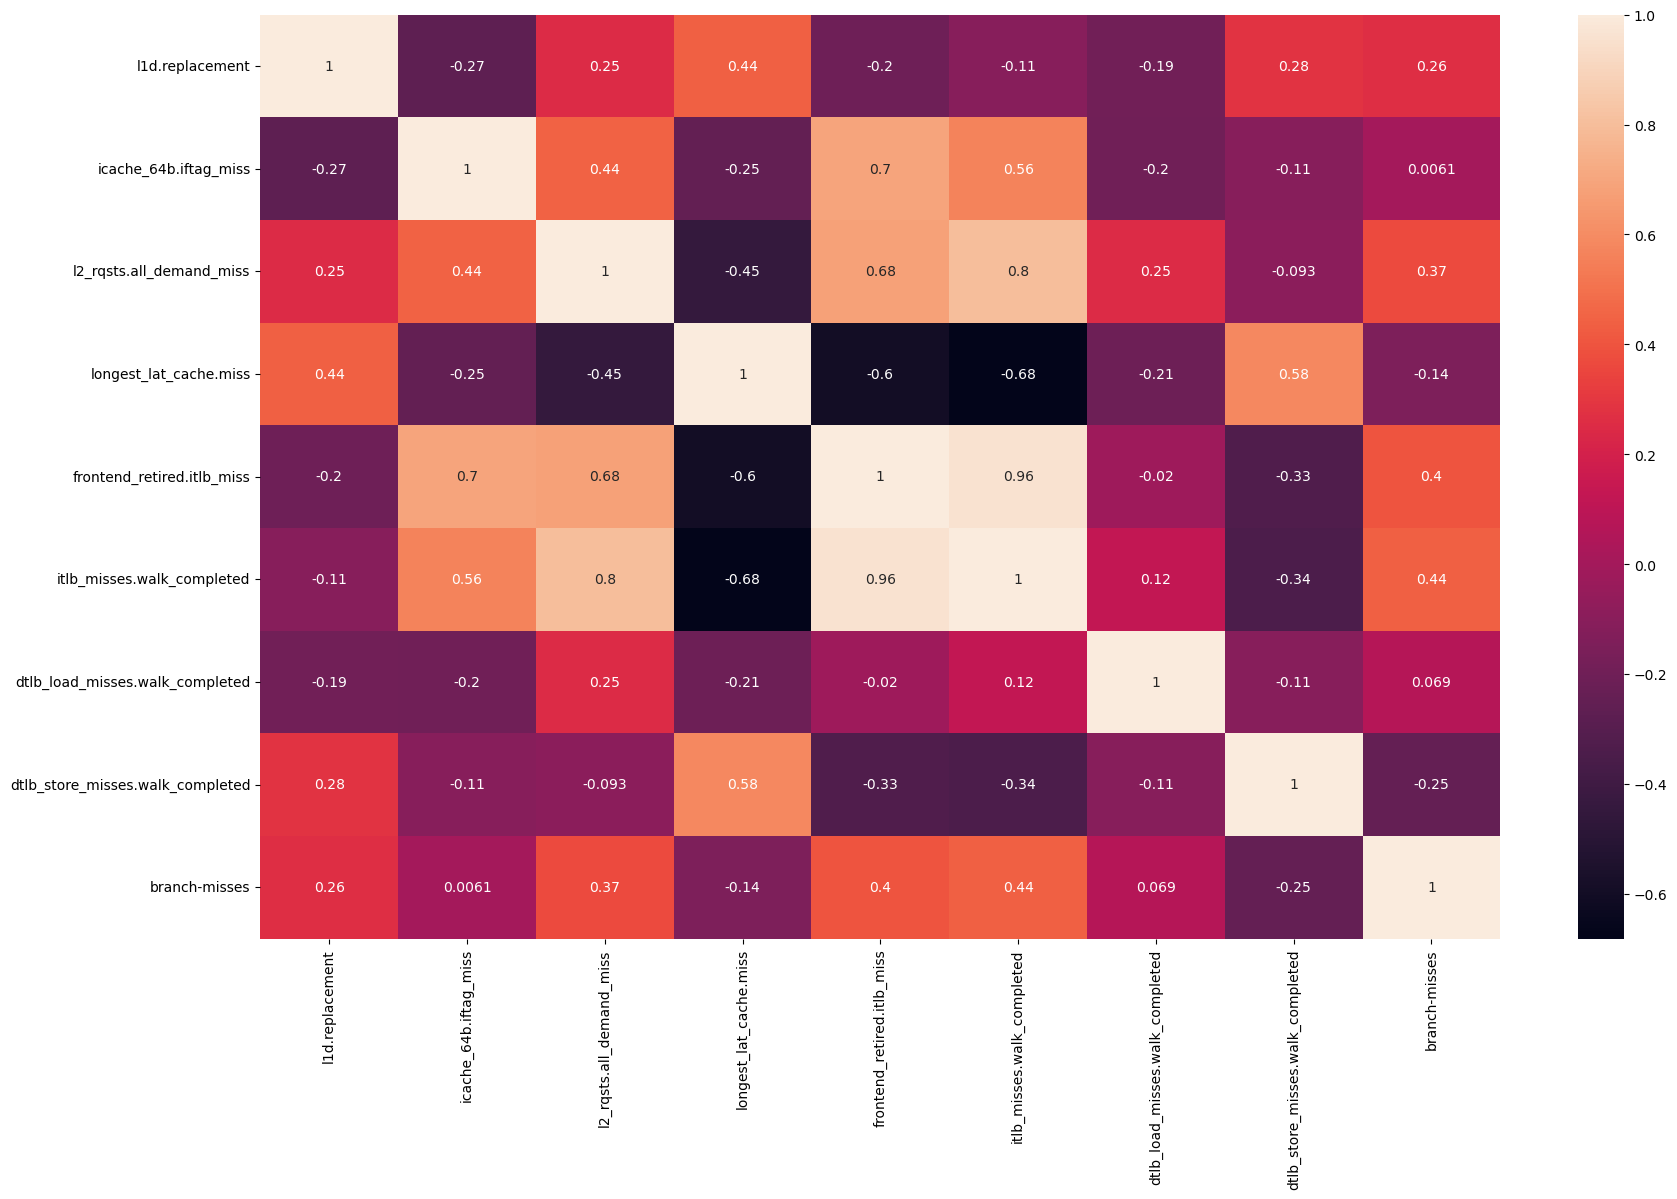

In [10]:
# creating a heatmap of the correlation matrix 
fig,axis = plt.subplots(figsize = (20,12))
sns.heatmap(x.corr(),annot=True)

In [11]:
# dividing the data set into test and train set in a 20:80 ration with a random state so that
# the model trains on a particular set of values on every execution 
X_train, X_test, y_train, y_test = train_test_split( 
    x, y, test_size=.20,random_state=55) 

In [12]:
# using MinMax Scaler to scale the data within the given range of 0 to 1 such that
#shape of the original distribution is same after transformation
mms = p.MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [13]:
print("X_train :-\n",X_train)

X_train :-
 [[0.79314573 0.0050912  0.14600265 ... 0.03258717 0.06711874 0.29205225]
 [0.09406963 0.07198746 0.20338952 ... 0.23342334 0.01151723 0.18276533]
 [0.58085627 0.26508165 0.7363117  ... 0.33574908 0.0223402  0.51011721]
 ...
 [0.5896975  0.25885378 0.75880007 ... 0.2276213  0.01707649 0.50495522]
 [0.53056337 0.00699969 0.262387   ... 0.24328858 0.02494733 0.73195749]
 [0.58800353 0.2532273  0.74706091 ... 0.34812232 0.02175311 0.50234237]]


In [14]:
# mean of all the columns of the training set 
df2 = X_train.mean(axis=0)
print(df2)

[0.43088568 0.23202107 0.43205713 0.24074808 0.39568289 0.44692034
 0.19674435 0.02998797 0.41483899]


In [15]:
# creating a linear regression model using sklearn.linear_model 
model = LinearRegression(positive=True)
model.fit(X_train,y_train)

LinearRegression(positive=True)

In [16]:
# finding the coefficients given by our model 
c=model.coef_
print("\nCoefficients :- \n",c)


Coefficients :- 
 [0.         0.09134632 0.         0.         0.03808315 0.
 0.         0.07557319 0.        ]


In [17]:
# model intercept i.e. the " Base CPI " 
i=model.intercept_
print("\nBase CPI : ",i)


Base CPI :  0.38959324688623


In [18]:
# making the predictions using our model on the test set 
predictions = model.predict(X_test) 

In [19]:
# Actual CPI
ACPI = y_test.mean()
print("\n Actual CPI : ",ACPI)


 Actual CPI :  0.42670313145756683


In [20]:
# Predicted CPI 
PCPI = predictions.mean()
print("\n Predicted CPI : ",PCPI)


 Predicted CPI :  0.42824986157706524


In [21]:
# Finding out RMSE , R^2 , adjusted R^2 using our predictions and test set
RMSE = mean_squared_error(y_test, predictions)
print("\n RMSE : ",RMSE)

R2 = r2_score(y_test, predictions)
print("\n R^2 : ",r2_score(y_test, predictions))

adjusted_r2 = 1 - ( 1-model.score(X_test,y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print("\n adjusted R^2 : ",adjusted_r2)


 RMSE :  0.0007099115294998692

 R^2 :  0.4930744890263563

 adjusted R^2 :  0.4799643465011758


In [22]:
# finding absolute error and accuracy on test set 
err = mean_absolute_error(y_test, predictions)
print ( "\n Test error is :" , err *100 , "% " )
print ( "\n Test Accuracy is :" , (1- err) *100 , "%" )


 Test error is : 2.463222168538672 % 

 Test Accuracy is : 97.53677783146134 %


In [23]:
# F-statistic value which should be > 2.5 and p-value which should be < 0.05
F = (R2/(1-R2))*((X_test.shape[0]-1-X_test.shape[1])/X_test.shape[1])
print("\n F-statistic : ",F)

p = 1-f.cdf(F,X_test.shape[1],(X_test.shape[0]-1-X_test.shape[1]))
print("\n p-value : ",p)


 F-statistic :  37.610154739303255

 p-value :  1.1102230246251565e-16


In [24]:
#no of coefficients 
X_test.shape[1]

9

In [25]:
# no of tuples in the test set 
X_test.shape[0]

358

In [26]:
# finding the residual for our test set 
residuals = y_test - predictions
print("\n Residual :- \n ",residuals)


 Residual :- 
  608     0.000956
799     0.009880
494     0.032234
1267    0.026791
911    -0.039996
          ...   
659    -0.019675
725    -0.021207
1773   -0.023418
658    -0.020445
535     0.033018
Name: CPI, Length: 358, dtype: float64


<AxesSubplot:xlabel='predicted', ylabel='residuals'>

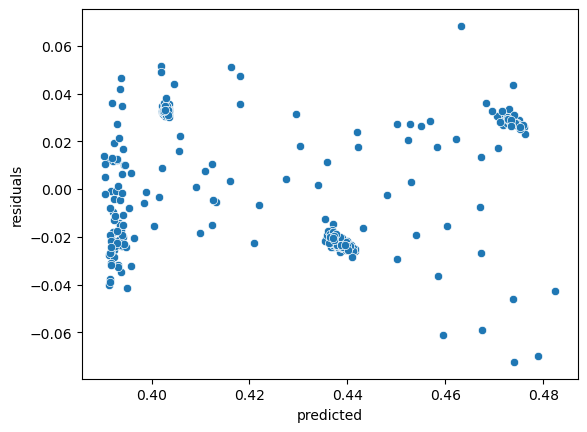

In [27]:
# residual graph 
data = {
    'predicted': [i for i in predictions], 
    'residuals': [i for i in residuals]
}

dfr = pd.DataFrame(data)
sns.scatterplot(data=dfr, x="predicted", y="residuals")

##### 